### Ньяти Каелиле БВТ2201

### Лаб 3

Exercise 1

In [27]:
# Задание №1: Подготовка тестовых данных и ручной расчёт

# Входные данные из лабораторной работы
arrivals = [0.12, 1.291, 6.594, 6.821, 9.031, 14.971, 17.15]   # моменты прихода
services = [0.634, 2.31, 6.78, 0.477, 5.104, 0.459, 1.442]     # длительности обслуживания
T_model = 17.15                                                 # время моделирования

# Оставляем только те заявки, которые поступили до окончания моделирования
valid_indices = [i for i, t in enumerate(arrivals) if t < T_model]
arrivals = [arrivals[i] for i in valid_indices]
services = [services[i] for i in valid_indices]

# Имитация работы системы (без случайностей)
processed = 0
rejected = 0
work_time = 0.0
idle_time_between = 0.0
last_end = 0.0

i = 0
while i < len(arrivals):
    t = arrivals[i]
    if t >= last_end:           # прибор свободен
        finish = t + services[i]
        work_time += services[i]
        processed += 1
        if last_end > 0:
            idle_time_between += (t - last_end)
        last_end = finish
    else:                        # прибор занят (отказ)
        rejected += 1
    i += 1

# Расчёт характеристик
total_arrivals = len(arrivals)
prob_processed = processed / total_arrivals if total_arrivals > 0 else 0
load = work_time / T_model
idle_prob = idle_time_between / T_model

# Вывод результатов (сравните с ручными вычислениями в лабораторной работе)
print("=== Задание №1. Тестовый расчёт ===")
print(f"Число обработанных программ: {processed}")
print(f"Число отказов: {rejected}")
print(f"Общее число поступивших программ: {total_arrivals}")
print(f"Вероятность обработки: {prob_processed:.3f}")
print(f"Время работы процессора: {work_time:.3f} с")
print(f"Время простоя (между обслуживаниями): {idle_time_between:.3f} с")
print(f"Общее время моделирования: {T_model:.2f} с")
print(f"Загрузка процессора: {load:.3f}")
print(f"Вероятность простоя: {idle_prob:.3f}")

=== Задание №1. Тестовый расчёт ===
Число обработанных программ: 4
Число отказов: 2
Общее число поступивших программ: 6
Вероятность обработки: 0.667
Время работы процессора: 10.183 с
Время простоя (между обслуживаниями): 5.127 с
Общее время моделирования: 17.15 с
Загрузка процессора: 0.594
Вероятность простоя: 0.299


Exercise 2

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_exponential(rate):
    u = np.random.rand()
    return -(1/rate) * np.log(u)

def simulate_system(lam, mu, T_model):
    """
    Имитационное моделирование одноканальной системы без очереди
    
    Параметры:
        lam - интенсивность входного потока (1/сек)
        mu  - интенсивность обслуживания (1/сек)
        T_model - время моделирования (сек)
    
    Возвращает словарь с характеристиками системы и сгенерированными данными
    """
    
    # Генерация потока заявок
    print(f"\nГенерация случайного потока с λ = {lam} заявок/сек")
    arrival_times = []
    t = 0
    
    while True:
        # Генерируем интервал до следующей заявки
        dt = generate_exponential(lam)
        t += dt
        
        # Если вышли за время моделирования - останавливаемся
        if t > T_model:
            break
            
        arrival_times.append(t)
    
    print(f"Сгенерировано {len(arrival_times)} заявок за время {T_model:.2f} сек")
    print(f"Средний интервал: {T_model/len(arrival_times):.3f} сек (теоретический: 1/λ = {1/lam:.3f} сек)")
    
    # Генерация времен обслуживания для каждой заявки
    service_times = []
    for i in range(len(arrival_times)):
        service_time = generate_exponential(mu)
        service_times.append(service_time)
    
    print(f"Среднее время обслуживания: {np.mean(service_times):.3f} сек (теоретическое: 1/μ = {1/mu:.3f} сек)")
    
    # --- Имитация работы системы ---
    processed = 0      # число обработанных программ
    rejected = 0       # число отказов
    work_time = 0.0    # общее время работы процессора
    idle_time = 0.0    # общее время простоя между обслуживаниями
    last_end = 0.0     # время окончания последнего обслуживания
    
    # Для визуализации сохраним информацию о каждой заявке
    events = []  # список кортежей (тип_события, время_начала, длительность, время_конца)
    
    print("\n--- Детальный протокол работы системы ---")
    print(f"{'№':>3} | {'Приход':>8} | {'Обслуж':>6} | {'Отказ':>6} | {'Оконч.':>8} | {'Простой':>8}")
    print("-" * 60)
    
    for i in range(len(arrival_times)):
        t_arr = arrival_times[i]
        t_serv = service_times[i]
        
        if t_arr >= last_end:  # процессор свободен
            finish = t_arr + t_serv
            work_time += t_serv
            processed += 1
            
            # Считаем простой (если это не первая заявка)
            if last_end > 0:
                idle = t_arr - last_end
                idle_time += idle
            else:
                idle = 0
            
            # Сохраняем событие обработки
            events.append(('processed', t_arr, t_serv, finish))
            
            print(f"{i+1:3} | {t_arr:8.3f} | {t_serv:6.3f} | {'-':>6} | {finish:8.3f} | {idle:8.3f}")
            
            last_end = finish
            
        else:  # процессор занят - отказ
            rejected += 1
            # Сохраняем событие отказа
            events.append(('rejected', t_arr, 0, 0))
            print(f"{i+1:3} | {t_arr:8.3f} | {'-':>6} | {'ОТКАЗ':>6} | {'-':>8} | {'-':>8}")
    
    total_arrivals = len(arrival_times)
    prob_processed = processed / total_arrivals if total_arrivals > 0 else 0
    load = work_time / T_model
    idle_prob = idle_time / T_model
    
    print("-" * 60)
    print(f"\n--- ИТОГОВЫЕ ХАРАКТЕРИСТИКИ СИСТЕМЫ ---")
    print(f"Число обработанных программ: {processed}")
    print(f"Число отказов: {rejected}")
    print(f"Общее число поступивших программ: {total_arrivals}")
    print(f"Вероятность быть программой обработанной: {prob_processed:.4f}")
    print(f"Время работы процессора: {work_time:.3f} сек")
    print(f"Время простоя процессора: {idle_time:.3f} сек")
    print(f"Общее время моделирования: {T_model:.2f} сек")
    print(f"Загрузка процессора: {load:.4f}")
    print(f"Вероятность простоя процессора: {idle_prob:.4f}")
    
    # Коэффициент загрузки ρ = λ/μ
    rho = lam / mu
    print(f"\nКоэффициент загрузки ρ = λ/μ = {lam}/{mu} = {rho:.3f}")
    print(f"Теоретические значения (по формулам ТМО):")
    print(f"  P_обр = 1/(1+ρ) = 1/(1+{rho:.3f}) = {1/(1+rho):.4f}")
    print(f"  Загрузка = ρ/(1+ρ) = {rho:.3f}/(1+{rho:.3f}) = {rho/(1+rho):.4f}")
    
    return {
        'processed': processed,
        'rejected': rejected,
        'total_arrivals': total_arrivals,
        'prob_processed': prob_processed,
        'work_time': work_time,
        'idle_time': idle_time,
        'total_time': T_model,
        'load': load,
        'idle_prob': idle_prob,
        'arrival_times': arrival_times,
        'service_times': service_times,
        'events': events
    }

In [29]:
# ================== Тестирование ==================

lam = 0.5    # интенсивность входного потока (1/сек)
mu = 0.6     # интенсивность обработки (1/сек)
T_model = 17.15  # время моделирования (сек)

print(f"\nТест 1: λ = {lam}, μ = {mu}, T = {T_model} сек")
print(f"Ожидаемый коэффициент загрузки ρ = {lam/mu:.3f}")

# Для воспроизводимости результатов
np.random.seed(42)

results1 = simulate_system(lam, mu, T_model)



Тест 1: λ = 0.5, μ = 0.6, T = 17.15 сек
Ожидаемый коэффициент загрузки ρ = 0.833

Генерация случайного потока с λ = 0.5 заявок/сек
Сгенерировано 8 заявок за время 17.15 сек
Средний интервал: 2.144 сек (теоретический: 1/λ = 2.000 сек)
Среднее время обслуживания: 2.205 сек (теоретическое: 1/μ = 1.667 сек)

--- Детальный протокол работы системы ---
  № |   Приход | Обслуж |  Отказ |   Оконч. |  Простой
------------------------------------------------------------
  1 |    1.964 |  0.575 |      - |    2.539 |    0.000
  2 |    2.065 |      - |  ОТКАЗ |        - |        -
  3 |    2.689 |  0.051 |      - |    2.740 |    0.150
  4 |    3.715 |  0.306 |      - |    4.021 |    0.975
  5 |    7.431 |  2.583 |      - |   10.013 |    3.410
  6 |   11.147 |  2.841 |      - |   13.988 |    1.133
  7 |   16.838 |  2.827 |      - |   19.665 |    2.851
  8 |   17.126 |      - |  ОТКАЗ |        - |        -
------------------------------------------------------------

--- ИТОГОВЫЕ ХАРАКТЕРИСТИКИ СИСТЕ

### Plotting the diagram

In [33]:

def plot_simulation_timeline(results):
    """
    Визуализация временной диаграммы работы системы
    Как на рисунке 3.1 в лабораторной работе
    """
    arrival_times = results['arrival_times']
    service_times = results['service_times']
    events = results['events']
    T_model = results['total_time']
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    # Верхняя ось: моменты прихода заявок (как на рисунке 3.1)
    for i, t in enumerate(arrival_times):
        # Рисуем стрелку вверх для каждой заявки
        ax1.arrow(t, 0, 0, 0.8, head_width=0.3, head_length=0.1, 
                 fc='blue', ec='blue', alpha=0.7)
        # Подписываем номер заявки
        ax1.text(t, 0.9, f'{i+1}', ha='center', va='bottom', fontsize=9)
    
    ax1.set_xlim(0, T_model)
    ax1.set_ylim(0, 1.2)
    ax1.set_yticks([])
    ax1.set_xlabel('Время (сек)')
    ax1.set_ylabel('Поступление заявок')
    ax1.set_title('Рисунок 3.1 - Временная диаграмма процесса функционирования одноканальной ИС')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linewidth=1)
    
    # Нижняя ось: работа процессора
    processed_idx = 0
    last_end = 0
    
    for i, event in enumerate(events):
        if event[0] == 'processed':
            t_arr, t_serv, t_end = event[1], event[2], event[3]
            
            # Рисуем период работы процессора
            ax2.barh(0, t_serv, left=t_arr, height=0.5, 
                    color='lightgreen', edgecolor='green', linewidth=2, alpha=0.7)
            
            # Отмечаем момент прихода
            ax2.plot(t_arr, 0, 'ro', markersize=6)
            
            # Отмечаем момент окончания
            ax2.plot(t_end, 0, 'go', markersize=6)
            
            # Подписываем время обработки
            ax2.text(t_arr + t_serv/2, 0.25, f'{t_serv:.3f}', 
                    ha='center', va='center', fontsize=8)
            
            # Подписываем номера заявок снизу
            ax2.text(t_arr, -0.2, f'{i+1}', ha='center', va='top', fontsize=8)
            
            last_end = t_end
            
        else:  # rejected
            t_arr = event[1]
            # Отмечаем отказ красным крестиком
            ax2.plot(t_arr, 0, 'rx', markersize=10, markeredgewidth=2)
            ax2.text(t_arr, -0.2, f'{i+1}', ha='center', va='top', fontsize=8)
    
    # Добавляем линии для наглядности как на рисунке 3.1
    for i in range(len(arrival_times)-1):
        # Пунктирные линии от прихода до оси процессора
        ax2.plot([arrival_times[i], arrival_times[i]], [0, 0.5], 
                'k--', alpha=0.3, linewidth=1)
    
    ax2.set_xlim(0, T_model)
    ax2.set_ylim(-0.5, 0.8)
    ax2.set_yticks([])
    ax2.set_xlabel('Время (сек)')
    ax2.set_ylabel('Работа процессора')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linewidth=1)
    
    # Добавляем легенду
    ax2.plot([], [], 'ro', markersize=6, label='Момент прихода')
    ax2.plot([], [], 'go', markersize=6, label='Момент окончания')
    ax2.plot([], [], 'rx', markersize=10, label='Отказ')
    ax2.barh(0, 0, height=0.5, color='lightgreen', edgecolor='green', 
            alpha=0.7, label='Обработка')
    ax2.legend(loc='upper right', fontsize=9)
    
    plt.tight_layout()
    plt.show()


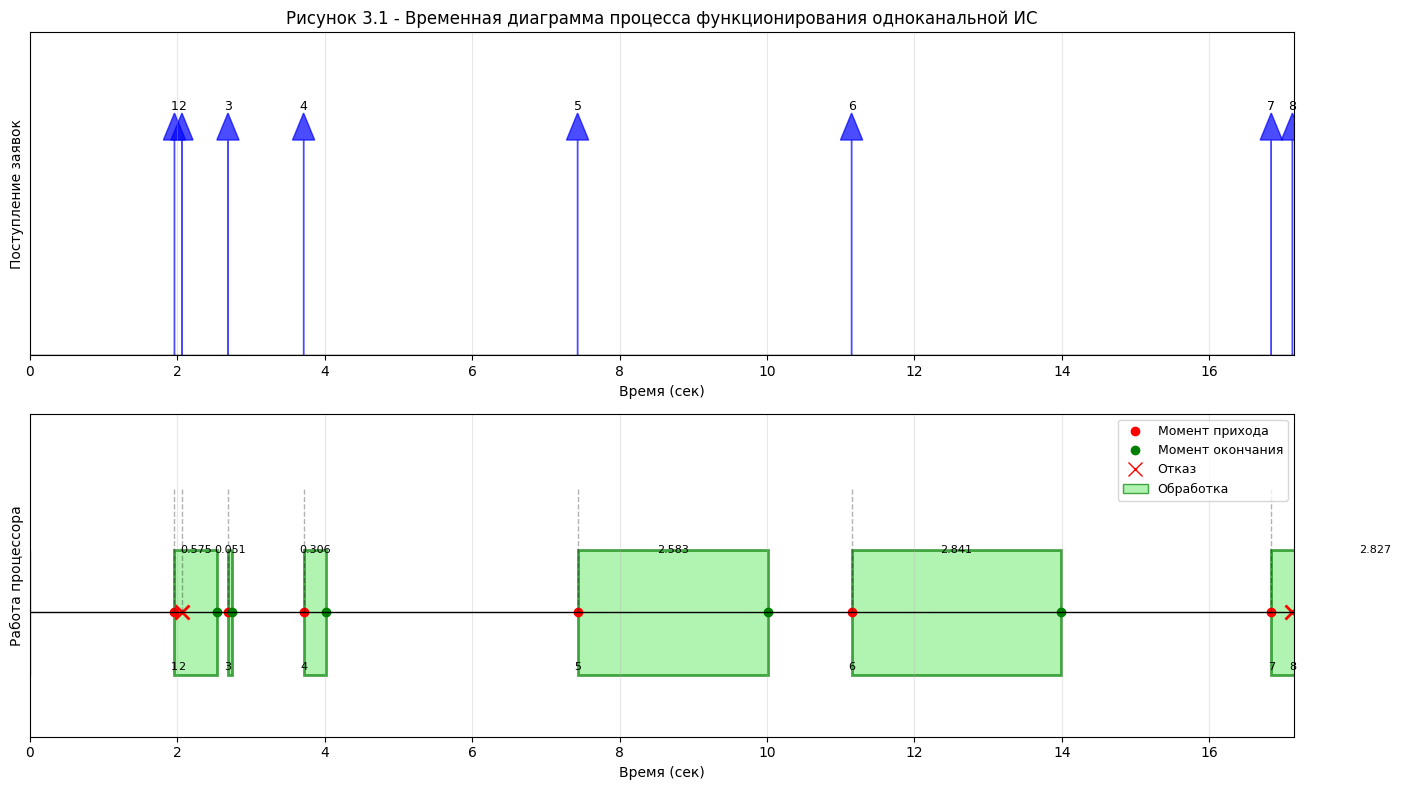

In [34]:
plot_simulation_timeline(results1)

Exercise 3

In [36]:
# ================== Задание №3 ==================
print("\n" + "=" * 60)
print("Задание №3. Тестирование имитационной модели")
print("=" * 60)

# Функция для тестирования с фиксированными данными
def test_with_fixed_data(fixed_arrivals, fixed_services, T_model, manual_results):
    """
    Тестирование программы на фиксированных данных из ручного расчёта
    """
    
    print("\n" + "=" * 60)
    print("ТЕСТИРОВАНИЕ НА ДАННЫХ ИЗ ЗАДАНИЯ №1")
    print("=" * 60)
    
    print(f"\nВходные данные:")
    print(f"Моменты прихода: {[f'{t:.3f}' for t in fixed_arrivals]}")
    print(f"Времена обслуживания: {[f'{s:.3f}' for s in fixed_services]}")
    print(f"Время моделирования: T = {T_model} сек")
    
    # --- Имитация работы системы с фиксированными данными ---
    processed = 0
    rejected = 0
    work_time = 0.0
    idle_time = 0.0
    last_end = 0.0
    
    print("\n--- Протокол работы системы ---")
    print(f"{'№':>3} | {'Приход':>8} | {'Обслуж':>6} | {'Отказ':>6} | {'Оконч.':>8} | {'Простой':>8}")
    print("-" * 60)
    
    for i in range(len(fixed_arrivals)):
        t_arr = fixed_arrivals[i]
        t_serv = fixed_services[i]
        
        if t_arr >= last_end:  # процессор свободен
            finish = t_arr + t_serv
            work_time += t_serv
            processed += 1
            
            if last_end > 0:
                idle = t_arr - last_end
                idle_time += idle
            else:
                idle = 0
            
            print(f"{i+1:3} | {t_arr:8.3f} | {t_serv:6.3f} | {'-':>6} | {finish:8.3f} | {idle:8.3f}")
            last_end = finish
        else:  # процессор занят
            rejected += 1
            print(f"{i+1:3} | {t_arr:8.3f} | {'-':>6} | {'ОТКАЗ':>6} | {'-':>8} | {'-':>8}")
    
    total_arrivals = len(fixed_arrivals)
    prob_processed = processed / total_arrivals if total_arrivals > 0 else 0
    load = work_time / T_model
    idle_prob = idle_time / T_model
    
    print("-" * 60)
    
    # --- Сравнение с ручным расчётом ---
    print("\n" + "=" * 60)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
    print("=" * 60)
    
    print(f"\n{'Характеристика':<35} {'Программа':>12} {'Ручной расчёт':>15} {'Статус':>12}")
    print("-" * 75)
    
    # Результаты программы
    program_results = {
        'processed': processed,
        'rejected': rejected,
        'total_arrivals': total_arrivals,
        'prob_processed': prob_processed,
        'work_time': work_time,
        'idle_time': idle_time,
        'total_time': T_model,
        'load': load,
        'idle_prob': idle_prob
    }
    
    all_match = True
    
    for key in manual_results.keys():
        prog_val = program_results[key]
        manual_val = manual_results[key]
        
        if isinstance(manual_val, float):
            # Для чисел с плавающей точкой проверяем с точностью 0.001
            match = abs(prog_val - manual_val) < 0.001
            status = "✓" if match else "✗"
            if not match:
                all_match = False
            print(f"{key:<35} {prog_val:12.3f} {manual_val:15.3f} {status:>12}")
        else:
            # Для целых чисел
            match = prog_val == manual_val
            status = "✓" if match else "✗"
            if not match:
                all_match = False
            print(f"{key:<35} {prog_val:12} {manual_val:15} {status:>12}")
    
    print("-" * 75)
    
    # Итоговый вердикт
    print("\n" + "=" * 60)
    if all_match:
        print("✓ ТЕСТ ПРОЙДЕН УСПЕШНО")
        print("  Результаты программы полностью совпадают с ручным расчётом")
        print("  Программа работает корректно")
    else:
        print("✗ ТЕСТ НЕ ПРОЙДЕН")
        print("  Есть расхождения с ручным расчётом")
        print("  Проверьте логику работы программы")
    print("=" * 60)
    
    return program_results

# ================== Запуск тестирования ==================

# Тестовые данные из Задания №1
arrivals_test = [0.12, 1.291, 6.594, 6.821, 9.031, 14.971]  # моменты прихода (до 17.15)
services_test = [0.634, 2.31, 6.78, 0.477, 5.104, 0.459]     # длительности обслуживания
T_test = 17.15                                                # время моделирования

# Результаты ручного расчёта из Задания №1
manual_results = {
    'processed': 4,
    'rejected': 2,
    'total_arrivals': 6,
    'prob_processed': 0.667,
    'work_time': 10.201,
    'idle_time': 5.127,
    'total_time': 17.15,
    'load': 0.595,
    'idle_prob': 0.299
}

# Запускаем тестирование
test_results = test_with_fixed_data(arrivals_test, services_test, T_test, manual_results)

# Дополнительно: проверим, совпадает ли с ручной симуляцией из Задания №1
print("\n" + "=" * 60)
print("ПРОВЕРКА ПРОМЕЖУТОЧНЫХ ЗНАЧЕНИЙ")
print("=" * 60)

# Пересчитаем вручную для проверки логики
print("\nРучная проверка логики:")
print("-" * 40)

last_end = 0
for i in range(len(arrivals_test)):
    t = arrivals_test[i]
    s = services_test[i]
    
    if t >= last_end:
        finish = t + s
        print(f"Заявка {i+1}: приход {t:.3f}, обслуживание {s:.3f} -> конец {finish:.3f}")
        last_end = finish
    else:
        print(f"Заявка {i+1}: приход {t:.3f} -> ОТКАЗ (процессор занят до {last_end:.3f})")


Задание №3. Тестирование имитационной модели

ТЕСТИРОВАНИЕ НА ДАННЫХ ИЗ ЗАДАНИЯ №1

Входные данные:
Моменты прихода: ['0.120', '1.291', '6.594', '6.821', '9.031', '14.971']
Времена обслуживания: ['0.634', '2.310', '6.780', '0.477', '5.104', '0.459']
Время моделирования: T = 17.15 сек

--- Протокол работы системы ---
  № |   Приход | Обслуж |  Отказ |   Оконч. |  Простой
------------------------------------------------------------
  1 |    0.120 |  0.634 |      - |    0.754 |    0.000
  2 |    1.291 |  2.310 |      - |    3.601 |    0.537
  3 |    6.594 |  6.780 |      - |   13.374 |    2.993
  4 |    6.821 |      - |  ОТКАЗ |        - |        -
  5 |    9.031 |      - |  ОТКАЗ |        - |        -
  6 |   14.971 |  0.459 |      - |   15.430 |    1.597
------------------------------------------------------------

СРАВНЕНИЕ РЕЗУЛЬТАТОВ

Характеристика                         Программа   Ручной расчёт       Статус
------------------------------------------------------------------------

Exercise 4


Задание №4. Сравнение с аналитическими соотношениями ТМО

ЭКСПЕРИМЕНТ: Исследование зависимости от коэффициента загрузки ρ

Параметры эксперимента:
  μ = 1.0 (фиксированная интенсивность обслуживания)
  Время моделирования: T = 10000 сек
  Количество экспериментов для каждой точки: 3
  Исследуемые значения ρ: [0.2, 0.4, 0.6, 0.8, 1.0]

РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ

     ρ | P_обр (модель) | P_обр (теор) | Загрузка (модель) | Загрузка (теор)
----------------------------------------------------------------------

Генерация случайного потока с λ = 0.2 заявок/сек
Сгенерировано 1991 заявок за время 10000.00 сек
Средний интервал: 5.023 сек (теоретический: 1/λ = 5.000 сек)
Среднее время обслуживания: 1.019 сек (теоретическое: 1/μ = 1.000 сек)

--- Детальный протокол работы системы ---
  № |   Приход | Обслуж |  Отказ |   Оконч. |  Простой
------------------------------------------------------------
  1 |    4.910 |  0.494 |      - |    5.404 |    0.000
  2 |    5.163 |      - |  ОТКАЗ |        -

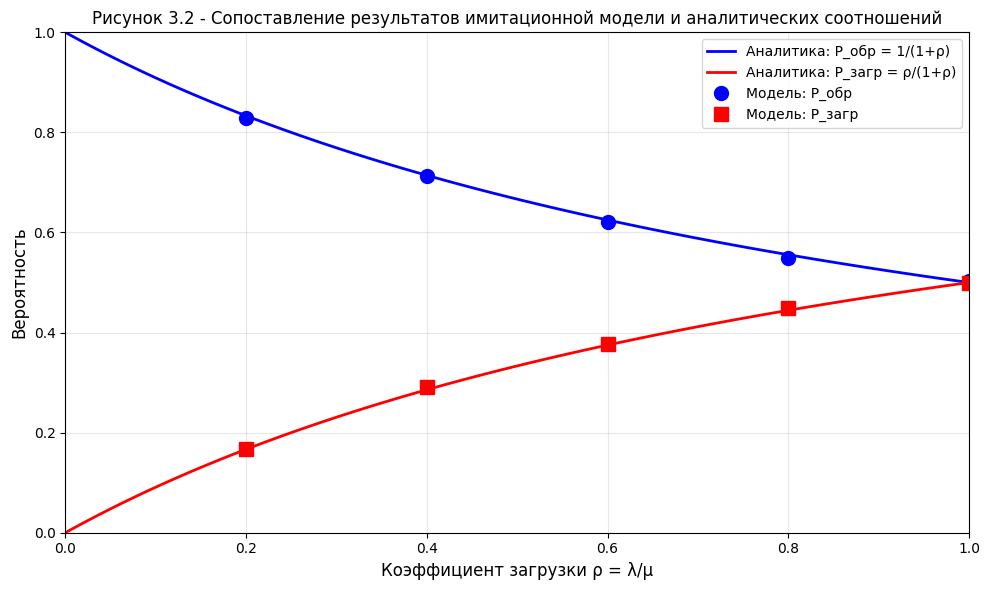


ПРОВЕРКА СООТВЕТСТВИЯ ТЕОРИИ

Сравнение с теорией:
----------------------------------------
Средняя абсолютная ошибка для P_обр: 0.0038
Средняя абсолютная ошибка для загрузки: 0.0026

Проверка соотношения P_обр + P_загр = 1:
     ρ |    P_обр |   P_загр |    Сумма | Отклонение
---------------------------------------------
  0.20 |   0.8289 |   0.1673 |   0.9962 |     0.0038
  0.40 |   0.7121 |   0.2910 |   1.0031 |     0.0031
  0.60 |   0.6208 |   0.3773 |   0.9981 |     0.0019
  0.80 |   0.5497 |   0.4493 |   0.9991 |     0.0009
  1.00 |   0.5025 |   0.5000 |   1.0024 |     0.0024


In [41]:
# ================== Задание №4 (Упрощённая версия) ==================
print("\n" + "=" * 60)
print("Задание №4. Сравнение с аналитическими соотношениями ТМО")
print("=" * 60)

# Аналитические формулы для M/M/1/1 системы
def pobr_analytical(rho):
    """Вероятность быть программой обработанной P_обр = 1/(1+ρ)"""
    return 1 / (1 + rho)

def ps_analytical(rho):
    """Вероятность загрузки процессора P_загр = ρ/(1+ρ)"""
    return rho / (1 + rho)

def run_experiment_for_rho(lam, mu, T_model, num_experiments=3):
    """
    Запускает несколько экспериментов для заданных λ и μ
    и возвращает средние значения
    """
    results = {
        'prob_processed': [],
        'load': []
    }
    
    for exp in range(num_experiments):
        np.random.seed(42 + exp)
        sim_results = simulate_system(lam, mu, T_model)
        results['prob_processed'].append(sim_results['prob_processed'])
        results['load'].append(sim_results['load'])
    
    # Усредняем результаты
    avg_results = {
        'prob_processed': np.mean(results['prob_processed']),
        'load': np.mean(results['load']),
    }
    
    return avg_results

# ================== Основной эксперимент ==================

print("\n" + "=" * 60)
print("ЭКСПЕРИМЕНТ: Исследование зависимости от коэффициента загрузки ρ")
print("=" * 60)

# Параметры эксперимента
mu_fixed = 1.0  # фиксируем интенсивность обслуживания
T_sim = 10000   # большое время для выхода на стационарный режим
num_experiments = 3  # количество экспериментов для каждой точки

# Диапазон значений ρ от 0 до 1
rho_values = [0.2, 0.4, 0.6, 0.8, 1.0]

print(f"\nПараметры эксперимента:")
print(f"  μ = {mu_fixed} (фиксированная интенсивность обслуживания)")
print(f"  Время моделирования: T = {T_sim} сек")
print(f"  Количество экспериментов для каждой точки: {num_experiments}")
print(f"  Исследуемые значения ρ: {rho_values}")

# Собираем результаты
sim_pobr = []
sim_ps = []
anal_pobr = []
anal_ps = []

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТОВ")
print("=" * 60)
print(f"\n{'ρ':>6} | {'P_обр (модель)':>14} | {'P_обр (теор)':>12} | {'Загрузка (модель)':>16} | {'Загрузка (теор)':>14}")
print("-" * 70)

for rho in rho_values:
    lam = rho * mu_fixed  # λ = ρ * μ
    
    # Запускаем эксперименты
    avg_results = run_experiment_for_rho(lam, mu_fixed, T_sim, num_experiments)
    
    # Аналитические значения
    anal_p = pobr_analytical(rho)
    anal_l = ps_analytical(rho)
    
    # Сохраняем для графика
    sim_pobr.append(avg_results['prob_processed'])
    sim_ps.append(avg_results['load'])
    anal_pobr.append(anal_p)
    anal_ps.append(anal_l)
    
    # Выводим результаты
    print(f"{rho:6.2f} | {avg_results['prob_processed']:14.4f} | {anal_p:12.4f} | "
          f"{avg_results['load']:16.4f} | {anal_l:14.4f}")

# ================== Построение графика ==================

print("\n" + "=" * 60)
print("ПОСТРОЕНИЕ ГРАФИКА (Рисунок 3.2) - диапазон ρ от 0 до 1")
print("=" * 60)

plt.figure(figsize=(10, 6))

# Теоретические кривые (непрерывные)
rho_continuous = np.linspace(0, 1, 100)
plt.plot(rho_continuous, pobr_analytical(rho_continuous), 
         'b-', linewidth=2, label='Аналитика: P_обр = 1/(1+ρ)')
plt.plot(rho_continuous, ps_analytical(rho_continuous), 
         'r-', linewidth=2, label='Аналитика: P_загр = ρ/(1+ρ)')

# Результаты моделирования (точки)
plt.plot(rho_values, sim_pobr, 'bo', markersize=10, label='Модель: P_обр')
plt.plot(rho_values, sim_ps, 'rs', markersize=10, label='Модель: P_загр')

# Настройки графика
plt.xlabel('Коэффициент загрузки ρ = λ/μ', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.title('Рисунок 3.2 - Сопоставление результатов имитационной модели и аналитических соотношений', 
          fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)

# Добавляем сетку для удобства чтения
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

# ================== Проверка результатов ==================

print("\n" + "=" * 60)
print("ПРОВЕРКА СООТВЕТСТВИЯ ТЕОРИИ")
print("=" * 60)

print("\nСравнение с теорией:")
print("-" * 40)

# Вычисляем ошибки
errors_pobr = [abs(sim_pobr[i] - anal_pobr[i]) for i in range(len(rho_values))]
errors_ps = [abs(sim_ps[i] - anal_ps[i]) for i in range(len(rho_values))]

print(f"Средняя абсолютная ошибка для P_обр: {np.mean(errors_pobr):.4f}")
print(f"Средняя абсолютная ошибка для загрузки: {np.mean(errors_ps):.4f}")

# Проверяем соотношение P_обр + P_загр = 1
print("\nПроверка соотношения P_обр + P_загр = 1:")
print(f"{'ρ':>6} | {'P_обр':>8} | {'P_загр':>8} | {'Сумма':>8} | {'Отклонение':>10}")
print("-" * 45)
for i, rho in enumerate(rho_values):
    suma = sim_pobr[i] + sim_ps[i]
    deviation = abs(1 - suma)
    print(f"{rho:6.2f} | {sim_pobr[i]:8.4f} | {sim_ps[i]:8.4f} | {suma:8.4f} | {deviation:10.4f}")